## 02 scikit-learn 中的 kNN 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
raw_data_X = [[3.393533211, 2.331273381],
              [3.110073483, 1.781539638],
              [1.343808831, 3.368360954],
              [3.582294042, 4.679179110],
              [2.280362439, 2.866990263],
              [7.423436942, 4.696522875],
              [5.745051997, 3.533989803],
              [9.172168622, 2.511101045],
              [7.792783481, 3.424088941],
              [7.939820817, 0.791637231]
             ]
raw_data_y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

X_train = np.array(raw_data_X)
y_train = np.array(raw_data_y)

x = np.array([8.093607318, 3.365731514])

In [3]:
%run kNN_function/kNN.py

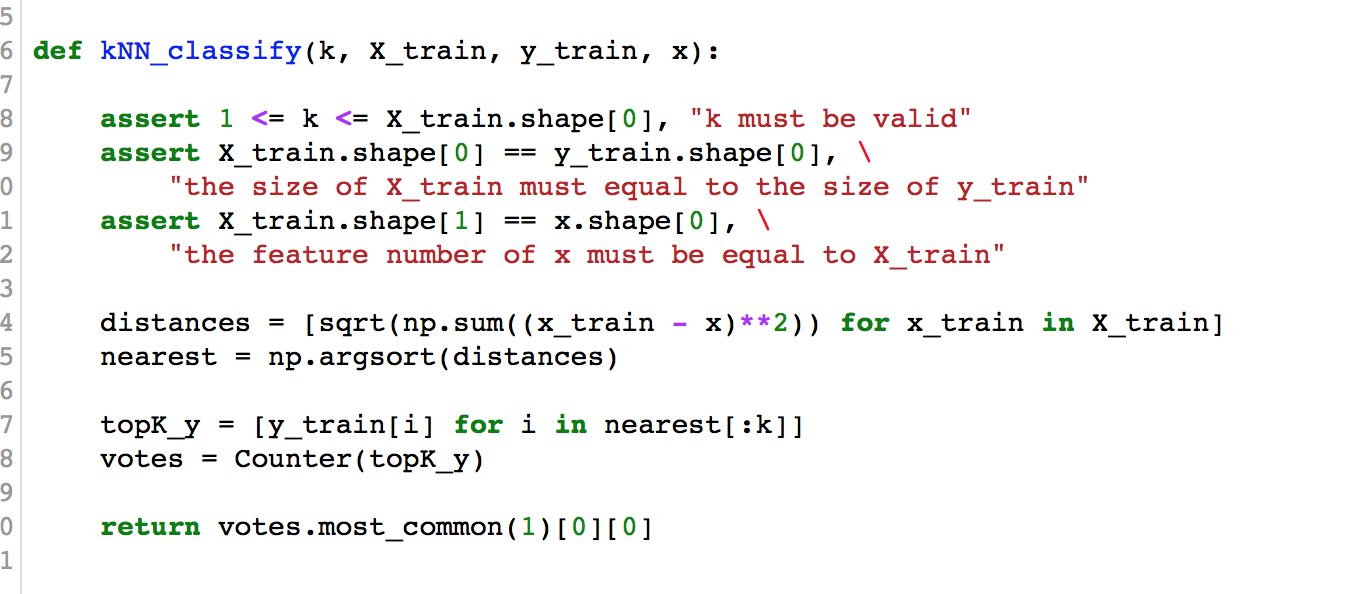

In [4]:
predict_y = kNN_classify(6, X_train, y_train, x)

In [1]:
predict_y

NameError: name 'predict_y' is not defined

### 使用scikit-learn中的kNN

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
kNN_classifier = KNeighborsClassifier(n_neighbors=6)

In [8]:
kNN_classifier.fit(X_train, y_train) # 返回值是他自己

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [9]:
kNN_classifier.predict(x)

/Users/yuanzhang/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([1])

In [10]:
X_predict = x.reshape(1, -1)

In [11]:
X_predict

array([[ 8.09360732,  3.36573151]])

In [12]:
kNN_classifier.predict(X_predict)

array([1])

In [13]:
y_predict = kNN_classifier.predict(X_predict)

In [14]:
y_predict[0]

1

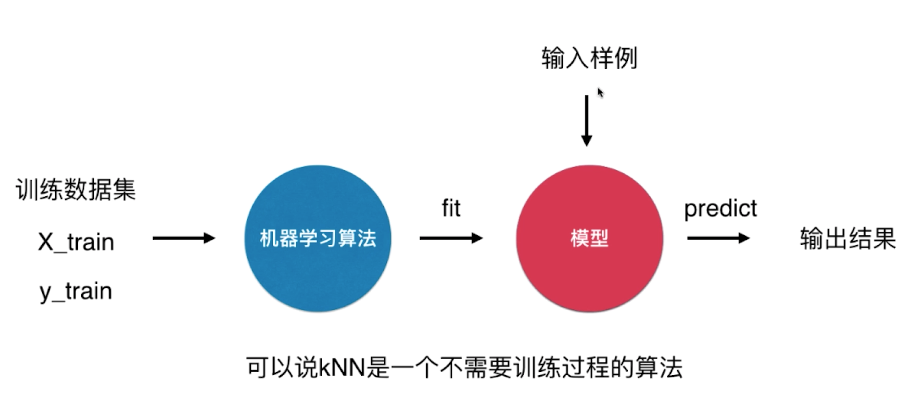

### 重新整理我们的kNN的代码

代码参见 [这里](kNN/KNN.py)

In [20]:
%run kNN/kNN.py

In [21]:
knn_clf = KNNClassifier(3)

In [22]:
knn_clf.fit(X_train, y_train)

KNN(k=3)

In [23]:
y_predict = knn_clf.predict(X_predict)

In [24]:
y_predict

array([1])

In [25]:
y_predict[0]

1